# Introduction to Robust Regression

In many real-world datasets, assumptions made by **Ordinary Least Squares (OLS)** regression — such as normally distributed residuals and the absence of significant outliers — are often violated. **Robust regression** provides a powerful alternative by being less sensitive to these violations, especially in the presence of **outliers** or **non-normal residuals**.

Unlike OLS, which minimizes the sum of squared residuals (and is highly sensitive to large errors), robust regression methods are designed to give more reliable estimates when the data is contaminated or irregular.

---

## Why Robust Regression?

- Real-world data often contains **outliers**.
- OLS can be **heavily influenced** by even a few abnormal observations.
- Robust regression techniques aim to **minimize the influence** of such points and **produce more reliable results**.

---

## Types of Robust Regression Techniques

Here are some commonly used robust regression techniques:

### 1. **Huber Regression**
- Combines the properties of OLS and Least Absolute Deviations (LAD).
- Uses a **loss function** that is quadratic for small residuals and linear for large residuals.
- Robust to outliers in the response variable.

### 2. **RANSAC Regression** (Random Sample Consensus)
- Iteratively fits a model on random subsets of the data.
- Selects the model with the most inliers (i.e., data points that fit well).
- Particularly effective when a **significant portion of the data contains outliers**.

### 3. **Theil-Sen Estimator**
- A non-parametric method that computes the **median of all pairwise slopes**.
- Very robust against outliers in both the predictors and response variable.
- Suitable for small datasets with potential noise.

### 4. **Quantile Regression**
- Estimates **conditional quantiles** (e.g., median) rather than the mean.
- Useful when the **distribution of residuals is skewed** or heteroscedastic.
- Offers a **more complete view** of the relationship between variables.

---

These robust methods provide alternative modeling strategies that can significantly improve regression performance in the presence of **non-ideal data conditions**. In the sections that follow, we’ll explore each method in detail with examples.


# Robust Regression with Huber Regressor

Lets explore the concept of **Huber Regression**, a robust method that combines the properties of both least squares regression and absolute error regression.

We'll use the **Diabetes dataset** from `sklearn.datasets`, perform exploratory data analysis, and compare the performance of Huber Regressor with standard Linear Regression.

---

## ✨ What You'll Learn
- Basics of regression and its limitations
- Why and when to use Huber Regression
- How to implement and tune Huber Regressor using `sklearn`
- Evaluating model robustness to outliers

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn utilities
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display settings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


## 📘 What is Huber Regression?

**Huber Regression** is a robust regression model that is less sensitive to outliers compared to ordinary least squares.

### How it works:

- For small errors, it behaves like **squared error loss** (like linear regression).
- For large errors (potential outliers), it behaves like **absolute error loss**.

This means the model is more **resistant to the influence of outliers**.

The Huber loss function is defined as:

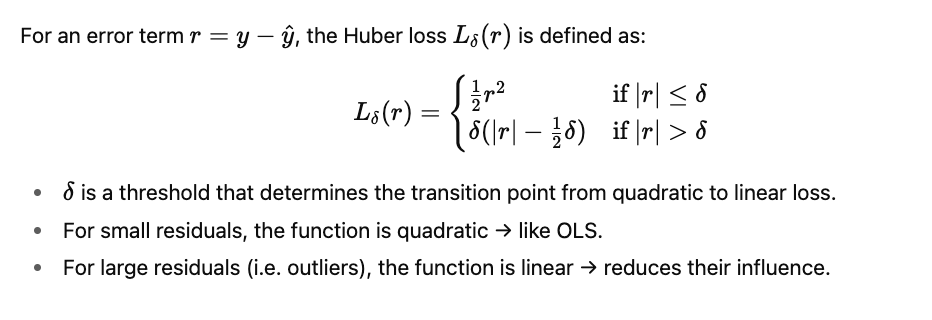

In [2]:
# Load diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Check the shape and first few rows
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
# Dataset info
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (442, 10)
Target shape: (442,)


In [4]:
# Correlation matrix to see relationship with target
df = X.copy()
df['target'] = y
df.corr()['target'].sort_values(ascending=False)


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

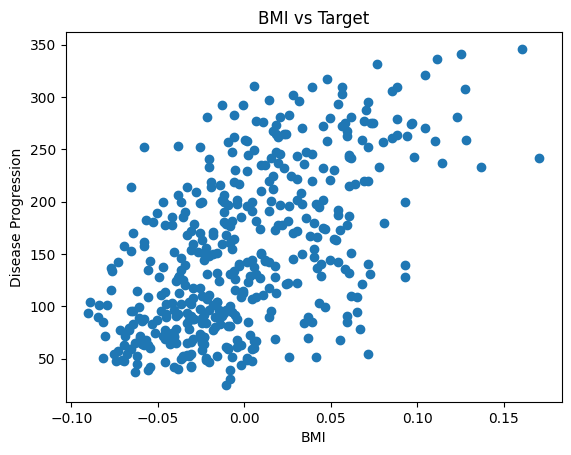

In [6]:
# Scatter plot for top correlated feature
plt.scatter(X['bmi'], y)
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("BMI vs Target")
plt.show()


In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Fit a standard linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Metrics
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 2900.1936284934814
MAE: 42.794094679599944
R² Score: 0.4526027629719195


In [9]:
# Fit a Huber Regressor
huber = HuberRegressor(epsilon=1.35)  # epsilon is similar to delta
huber.fit(X_train, y_train)

# Predictions
y_pred_huber = huber.predict(X_test)

# Metrics
print("Huber Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_huber))
print("MAE:", mean_absolute_error(y_test, y_pred_huber))
print("R² Score:", r2_score(y_test, y_pred_huber))


Huber Regression:
MSE: 2921.08730546954
MAE: 42.863027538654215
R² Score: 0.44865918453781584


## 🔍 Interpretation

- **Linear Regression** uses squared loss, which gives large weights to outliers. This can distort predictions if outliers are present.
- **Huber Regression** mitigates this by capping the loss for outliers, leading to potentially **lower MAE** and **more stable results** when outliers are present.

Try modifying the dataset to include artificial outliers and see how both models respond!


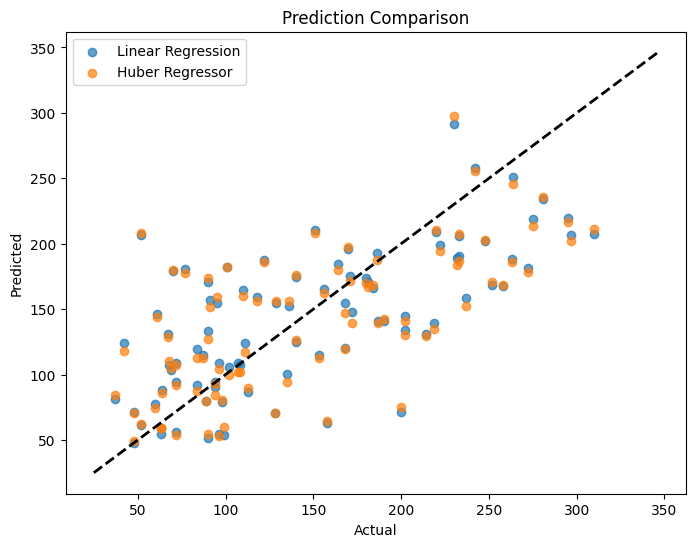

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_huber, label='Huber Regressor', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction Comparison")
plt.legend()
plt.show()


### Conclusion

- Huber Regression offers a robust alternative to Linear Regression.
- It balances the sensitivity of squared loss and the robustness of absolute error loss.
- In real-world scenarios with noisy data or outliers, **Huber Regressor** is often a better choice than traditional linear models.

# Robust Regression with RANSAC Regressor

In this notebook, we will explore **RANSAC Regression (RANdom SAmple Consensus)** — a robust regression technique that fits a model **to inliers only**, ignoring outliers during fitting.

---

## What You'll Learn
- Why outliers can distort linear regression
- The theory behind RANSAC
- How to implement RANSAC in Scikit-learn
- Compare RANSAC to standard Linear Regression


## 🤖 What is RANSAC Regression?

**RANSAC** (RANdom SAmple Consensus) is an iterative method to estimate parameters of a model from a dataset that **contains outliers**.

### How It Works:
1. Randomly select a small subset of the data (called inliers).
2. Fit a model to this subset.
3. Test all other data points:
   - If a point fits the model within a certain tolerance, it's also considered an inlier.
4. Refit the model using **all inliers**.
5. Repeat the above steps for a number of iterations.
6. Return the model with the **largest consensus set** (i.e., most inliers).

---

### Advantages:
- Highly **robust to outliers**.
- Doesn't assume a specific distribution for errors.

### Limitations:
- Computationally expensive (repeated iterations).
- Performance depends on the choice of:
  - Number of iterations
  - Residual threshold
  - Minimum sample size

### Why Use RANSAC?

- Traditional linear regression **minimizes squared error**, making it **sensitive to outliers**.
- RANSAC is robust because it **ignores outliers** during model fitting.

---

Objective Function:-

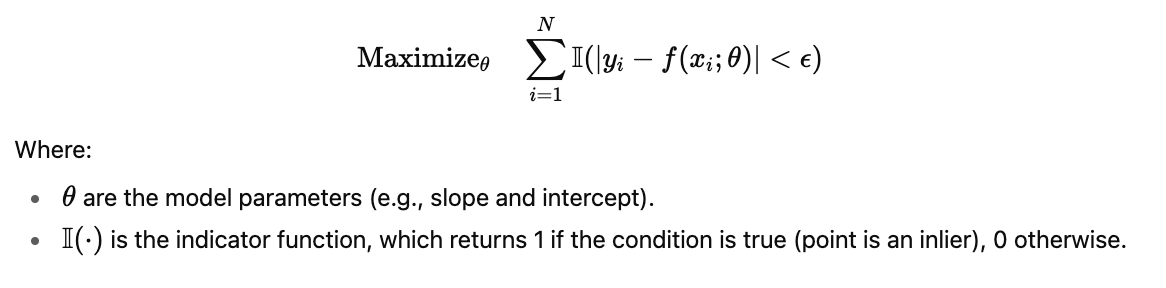

What RANSAC Optimizes:

It doesn't optimize a continuous loss function like MSE. Instead, it tries many different models and selects the one that:

- Has the most inliers, or

- Meets a minimum inlier count and gives a good enough model.

Once the best set of inliers is found, you can re-fit the model using just those points (e.g., via least squares).



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [12]:
# Create a linear dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add some outliers manually
np.random.seed(42)
n_outliers = 10
X[:n_outliers] = X[:n_outliers] + 3
y[:n_outliers] = y[:n_outliers] - 80

# Reshape X for plotting
X = X.reshape(-1, 1)


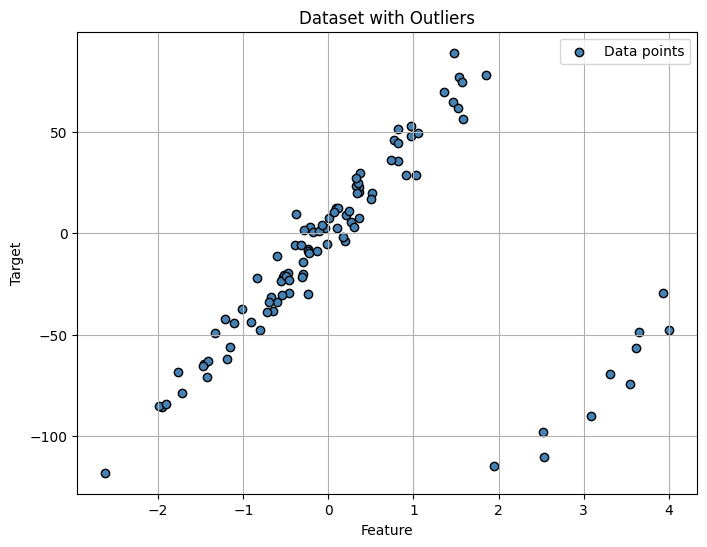

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='steelblue', edgecolor='k', label='Data points')
plt.title("Dataset with Outliers")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


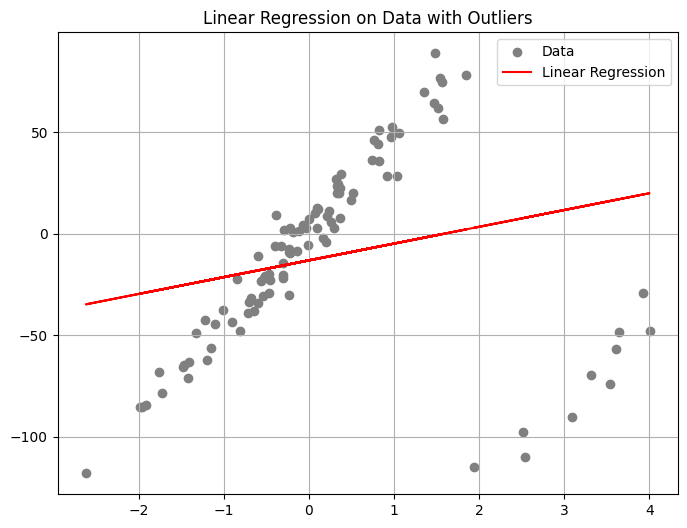

In [14]:
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# Plot Linear Regression
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, y_pred_lr, color='red', label='Linear Regression')
plt.title("Linear Regression on Data with Outliers")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# RANSAC model
ransac = RANSACRegressor(estimator=LinearRegression(), 
                         residual_threshold=20, 
                         max_trials=100, 
                         random_state=42)

ransac.fit(X, y)
y_pred_ransac = ransac.predict(X)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = ~inlier_mask


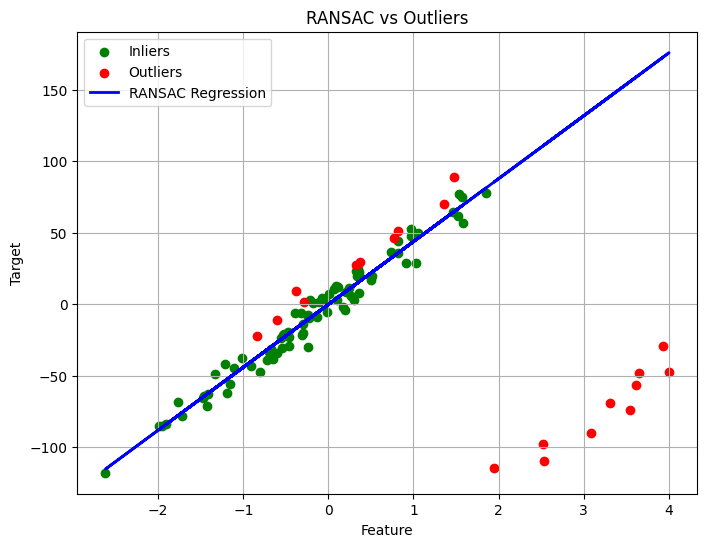

In [17]:
plt.figure(figsize=(8,6))

# Plot inliers
plt.scatter(X[inlier_mask], y[inlier_mask], color='green', label='Inliers')
# Plot outliers
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
# Plot prediction line
plt.plot(X, y_pred_ransac, color='blue', linewidth=2, label='RANSAC Regression')

plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("RANSAC vs Outliers")
plt.legend()
plt.grid(True)
plt.show()



In [18]:
print("Linear Regression:")
print(f"  R²: {r2_score(y, y_pred_lr):.3f}")
print(f"  MSE: {mean_squared_error(y, y_pred_lr):.2f}")

print("\nRANSAC Regression:")
print(f"  R²: {r2_score(y[inlier_mask], y_pred_ransac[inlier_mask]):.3f}")
print(f"  MSE (inliers only): {mean_squared_error(y[inlier_mask], y_pred_ransac[inlier_mask]):.2f}")


Linear Regression:
  R²: 0.059
  MSE: 1987.97

RANSAC Regression:
  R²: 0.969
  MSE (inliers only): 52.01


### Conclusion

- **Linear Regression** attempts to fit all points — including outliers — resulting in a distorted model.
- **RANSAC** isolates and **ignores outliers**, resulting in a better fit to the inlier data.
- It is especially useful when the data contains **corrupted samples**, measurement errors, or abnormal events.


# Robust Regression with Theil-Sen Estimator

## What is the Theil-Sen Estimator?

The **Theil-Sen Estimator** is a **robust linear regression model** that estimates the slope as the **median of all possible pairwise slopes** between sample points.

It is **non-parametric** and does not assume any specific distribution of the errors.

---

## Why Use It?

- Unlike ordinary least squares (OLS), it is **resistant to outliers**.
- It does **not require normally distributed residuals**.
- It performs well even when **up to 30% of data is corrupted**.

---

![image.png](attachment:image.png)

## How it works:

- Step 1: Compute All Pairwise Slopes
    For every pair of points, compute the slope. These slopes reflect the trend between each pair of points. 
- Step 2: Take the Median Slope
    Now, find the median of all the slopes. This median is the Theil–Sen estimate of the slope.
    Why the median? Because the median is resistant to extreme values, making this estimator robust to outliers.
- Step 3: Estimate the Intercept
    Once you have the slope , calculate an intercept for each point and calculate the median. This will be intercept estimate.
- Step 4: Now the final model is by using median estimate and intercept estimate .

## Why It Works (Intuition):
- Outliers can dramatically skew mean-based estimators (like OLS).
- Theil–Sen uses medians, which are stable even if a fraction of the data is noisy or corrupted.
- It's particularly useful when:

    - You expect up to ~30% outliers.
    - The data does not follow a Gaussian noise model.
    - You want a non-parametric, robust alternative to linear regression.
​
 




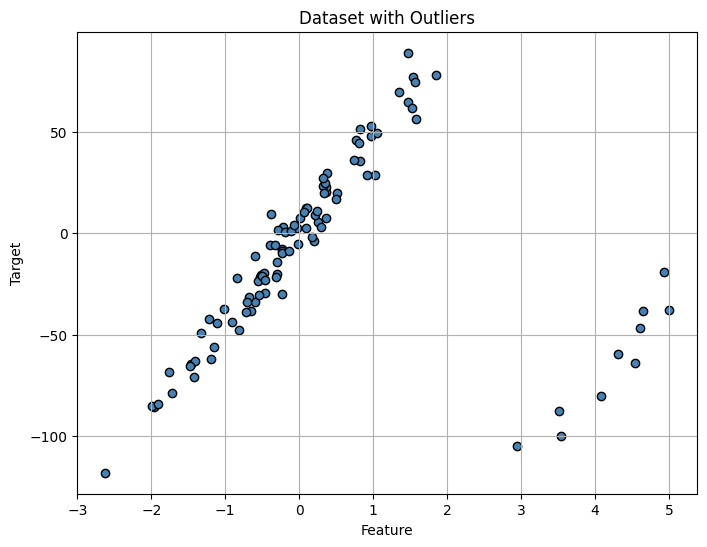

In [21]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, TheilSenRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add some outliers manually
np.random.seed(0)
X[:10] += 4
y[:10] -= 70

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='steelblue', edgecolor='k')
plt.title("Dataset with Outliers")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.grid(True)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [25]:
ts = TheilSenRegressor(random_state=42)
ts.fit(X_train, y_train)
y_pred_ts = ts.predict(X_test)


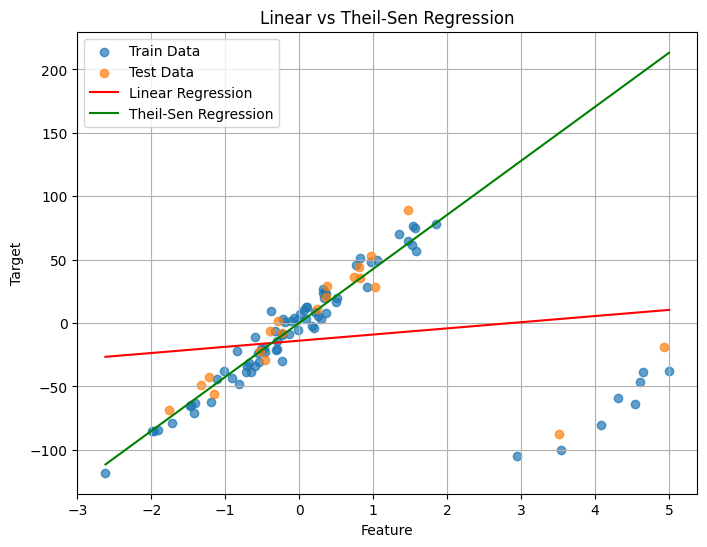

In [26]:
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(X_train, y_train, label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.7)

# Plot predictions
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(x_line, lr.predict(x_line), color='red', label='Linear Regression')
plt.plot(x_line, ts.predict(x_line), color='green', label='Theil-Sen Regression')

plt.title("Linear vs Theil-Sen Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
def print_metrics(name, y_true, y_pred):
    print(f"{name}:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"  MSE     : {mean_squared_error(y_true, y_pred):.2f}")
    print("-" * 30)

print_metrics("Linear Regression", y_test, y_pred_lr)
print_metrics("Theil-Sen Regression", y_test, y_pred_ts)


Linear Regression:
  R² Score: -0.0152
  MSE     : 1976.04
------------------------------
Theil-Sen Regression:
  R² Score: -1.8551
  MSE     : 5557.21
------------------------------


# Conclusion

- **Theil-Sen Regression** is a powerful tool for **robust linear modeling**.
- Unlike Linear Regression, it is **resistant to outliers**.
- Its performance is comparable to OLS when data is clean, but significantly better when data is noisy or corrupted.

---

## When to Use Theil-Sen:
- Outliers are present
- Residuals are not Gaussian
- You want a simple, interpretable, and robust model

# Quantile Regression

Quantile Regression estimates **conditional quantiles** of the response variable, offering a more **complete view** of the relationship between variables than ordinary least squares (OLS), which only estimates the **mean**.

---

## Why Quantile Regression?

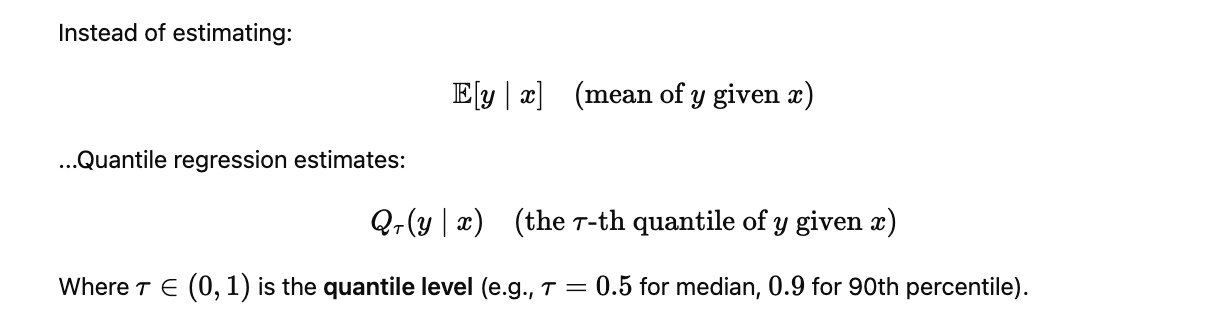

This allows:
- Predicting **median (50th percentile)** → Robust to outliers
- Estimating **confidence intervals** (e.g., 10th and 90th percentile)
- Handling **heteroscedasticity** (variance that changes with inputs)

---

## Applications
- Predicting housing prices with confidence intervals
- Risk modeling in finance (e.g. Value-at-Risk)
- Weather forecast range (e.g., low/high temperature)


## Quantile Regression Loss

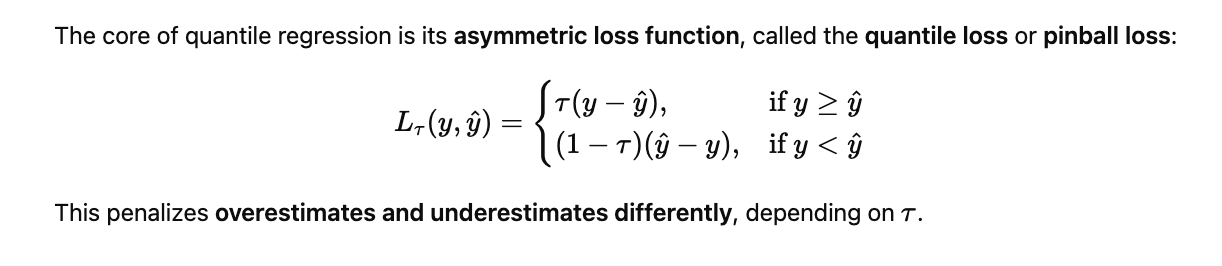


Intuition:

For median regression ( 𝜏 = 0.5), under- and over-predictions are penalized equally.

For 90th percentile (𝜏 = 0.9):

- Overpredicting (predicting too high) is penalized lightly (0.1 weight).

- Underpredicting (predicting too low) is penalized heavily (0.9 weight).

This makes the model focus on hitting that specific quantile.



In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import QuantileRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


In [30]:
# Load California housing dataset
data = fetch_california_housing()
X = data.data[:, [0]]  # Only use 'MedInc' (median income) feature for clarity
y = data.target        # Target: house value

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


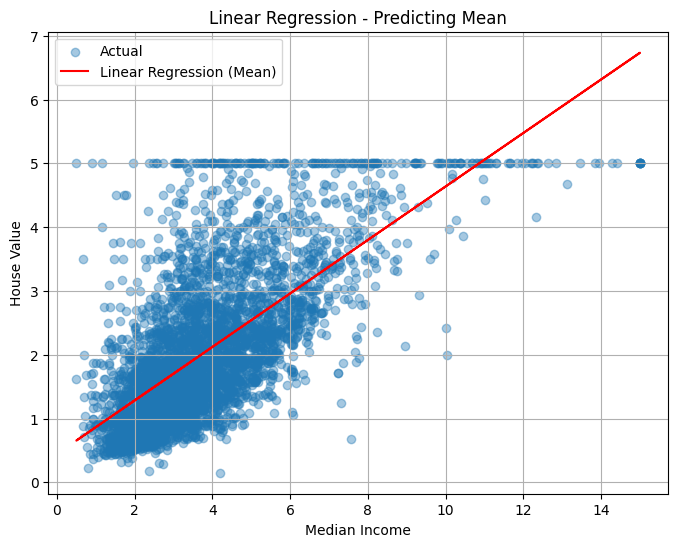

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, alpha=0.4, label="Actual")
plt.plot(X_test, y_pred_lr, color='red', label='Linear Regression (Mean)')
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("Linear Regression - Predicting Mean")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
quantiles = [0.1, 0.5, 0.9]  # Lower, Median, and Upper quantiles
models = {}

# Fit one model for each quantile
for q in quantiles:
    qr = QuantileRegressor(quantile=q, alpha=0.0, solver="highs")  # no regularization
    qr.fit(X_train, y_train)
    models[q] = qr


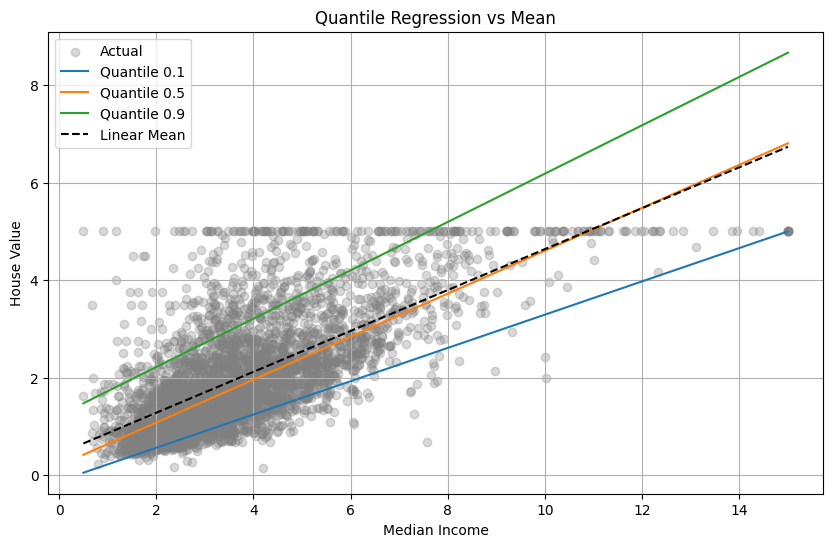

In [34]:
# Create grid for plotting
x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="gray", alpha=0.3, label="Actual")

# Plot each quantile regression line
for q, model in models.items():
    y_pred_q = model.predict(x_range)
    plt.plot(x_range, y_pred_q, label=f'Quantile {q}')

# Add mean model
plt.plot(x_range, lr.predict(x_range), color='black', linestyle='--', label='Linear Mean')

plt.title("Quantile Regression vs Mean")
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Evaluate the median model
median_model = models[0.5]
y_pred_median = median_model.predict(X_test)

print("Evaluation on Test Data:")
print("Linear Regression (Mean):")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")

print("\nQuantile Regression (Median):")
print(f"  MAE: {mean_absolute_error(y_test, y_pred_median):.3f}")


Evaluation on Test Data:
Linear Regression (Mean):
  MAE: 0.630

Quantile Regression (Median):
  MAE: 0.613


# Use Cases of Quantile Regression

Quantile regression is valuable when:

- You care about **uncertainty**, not just average prediction
- The data has **heteroscedasticity** (non-constant variance)
- You want **prediction intervals** instead of point estimates
- You're modeling **risk-sensitive applications**


# Conclusion

Quantile Regression provides a flexible and robust way to understand not just **what will happen on average**, but also **what could happen at different probability levels**.
